Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Adam Fariello"
COLLABORATORS = "Adam Fariello"

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Adam Fariello<br>

## CS 439 - Introduction to Data Science
### Fall 2022

# Lab 4: Kernel Density Estimators (60 points)

## Objective

In this lab you will get some practice in plotting, applying data transformations, and working with kernel density estimators.  We will be working with data from the World Bank containing various statistics for countries and territories around the world.  

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code


### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Load Data

Now, let us load some World Bank data into a pandas.DataFrame object named ```wb```.

In [3]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


List the columns of the data frame with their descriptions

In [4]:
## START SOLUTION
list(wb)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Part 1: Scaling and Plotting (20 pts)

## Task 1.1
In the first part of this assignment we will look at the distribution of values for female adult literacy rate as well as the gross national income per capita. Create two series that contains data on literature and income 

In [5]:
## START SOLUTION
temp = [
    'Adult literacy rate: Female: % ages 15 and older: 2005-14', 
    'Gross national income per capita, Atlas method: $: 2016'
]
df = wb.loc[:, temp]
df = df.dropna()
df.rename(
    columns = {
        'Adult literacy rate: Female: % ages 15 and older: 2005-14' :'literacy', 
        'Gross national income per capita, Atlas method: $: 2016':'income' 
    }, 
    inplace = True
)
df

,literacy,income
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
Angola,60.0,3440.0
Antigua and Barbuda,99.0,13400.0
...,...,...
Vietnam,91.0,2050.0
West Bank and Gaza,94.0,3230.0
"Yemen, Rep.",53.0,1040.0
Zambia,78.0,1300.0


In [6]:
# inspect the head of df
df.head(5)

,literacy,income
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
Angola,60.0,3440.0
Antigua and Barbuda,99.0,13400.0


## Task 1.2

Suppose we wanted to build a histogram of our data to understand the distribution of literacy rates and income per capita individually. The `countplot` can help create histograms from categorical data. Obtain the plots as shown below with the exact lables. 

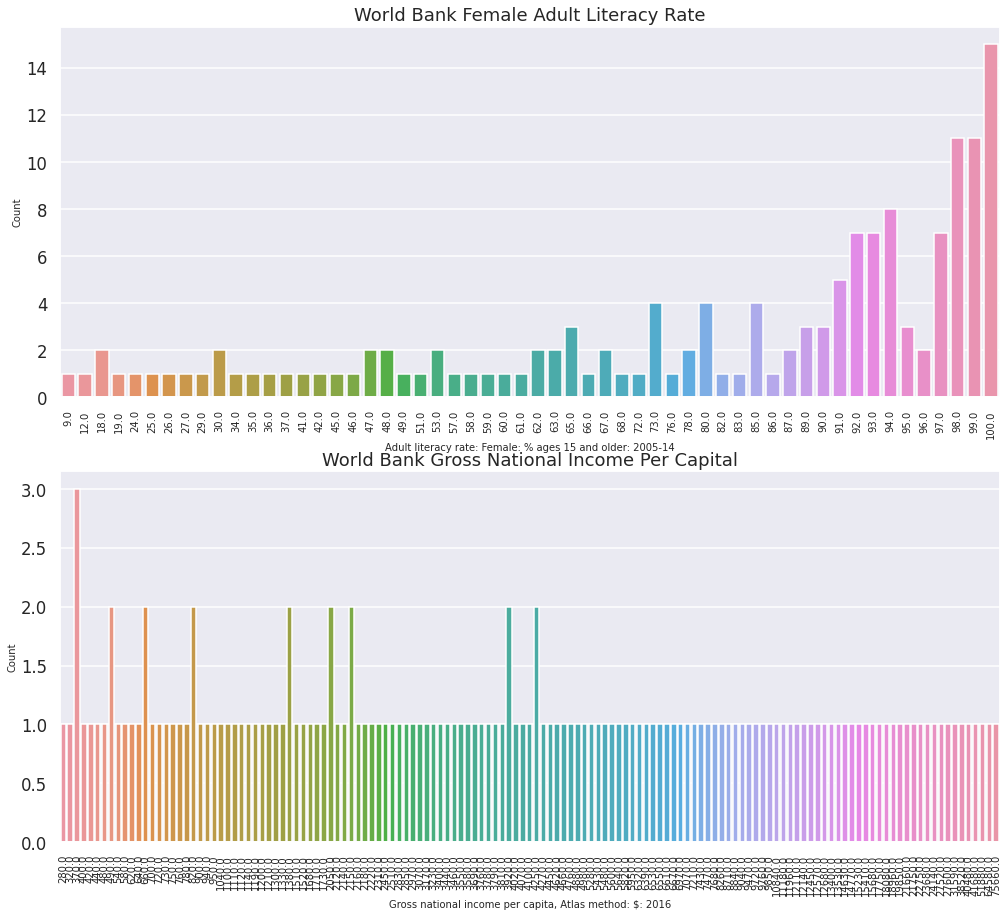

In [7]:
## START SOLUTION

#Setup
plt.figure(figsize=(15, 15))

#Top Graph
plt.subplot(211)
ax = sns.countplot(x = df["literacy"])
ax.set(
    xlabel = "Adult literacy rate: Female: % ages 15 and older: 2005-14",
    ylabel = "Count",
    title = "World Bank Female Adult Literacy Rate" 
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size = 10)
#sns.set(rc={"figure.figsize":(16, 10)})

#Bottom Graph
plt.subplot(212)
ax = sns.countplot(x = df["income"])
ax.set(
    xlabel = "Gross national income per capita, Atlas method: $: 2016",
    ylabel = "Count",
    title  = "World Bank Gross National Income Per Capital",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size = 10)
#sns.set(rc={"figure.figsize":(16, 10)})

plt.show()

## Task 1.3
In the cell below, concisely explain why `countplot` is NOT the right tool for the job.

In [8]:
# YOUR CODE HERE
"""
countplot is terrible for taking acount for Gross National Income 
because it flattens out the data on the graph and doens't give much
to extrapolate from it.
"""

"\ncountplot is terrible for taking acount for Gross National Income \nbecause it flattens out the data on the graph and doens't give much\nto extrapolate from it.\n"

## Task 1.4
An alternate type of plot is the `barplot`, which as you'll obtain below, provides some vague idea of the distribution, but this is also not what we want.

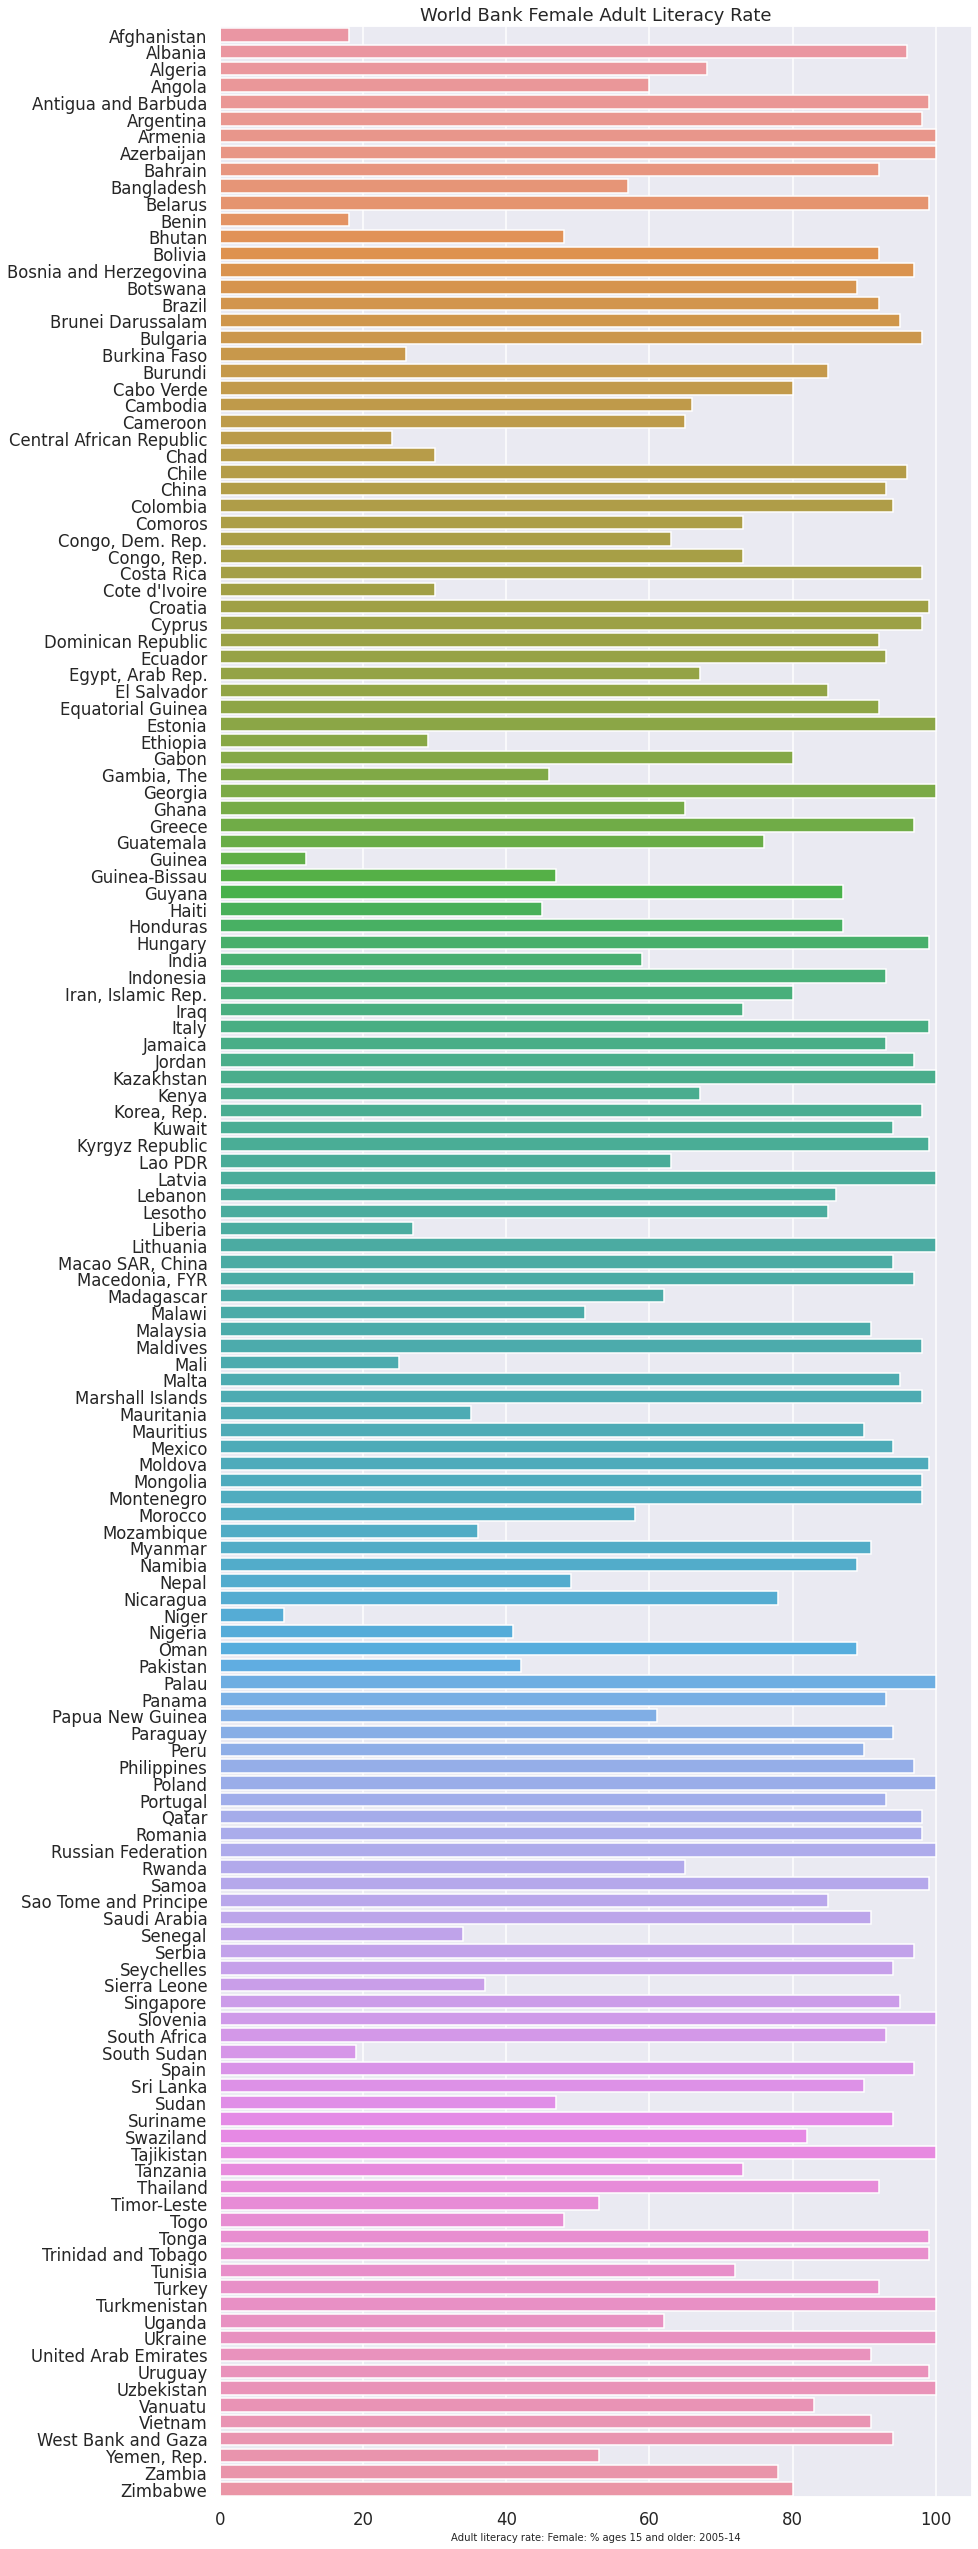

In [9]:
## START SOLUTION
plt.figure(figsize=(12, 100))

#top graph
plt.subplot(211)
ax = sns.barplot(x = df["literacy"], y = df.index)
ax.set(
    xlabel = "Adult literacy rate: Female: % ages 15 and older: 2005-14",
    title = "World Bank Female Adult Literacy Rate" 
)
#sns.set(rc={"figure.figsize":(10, 20)})

plt.show()

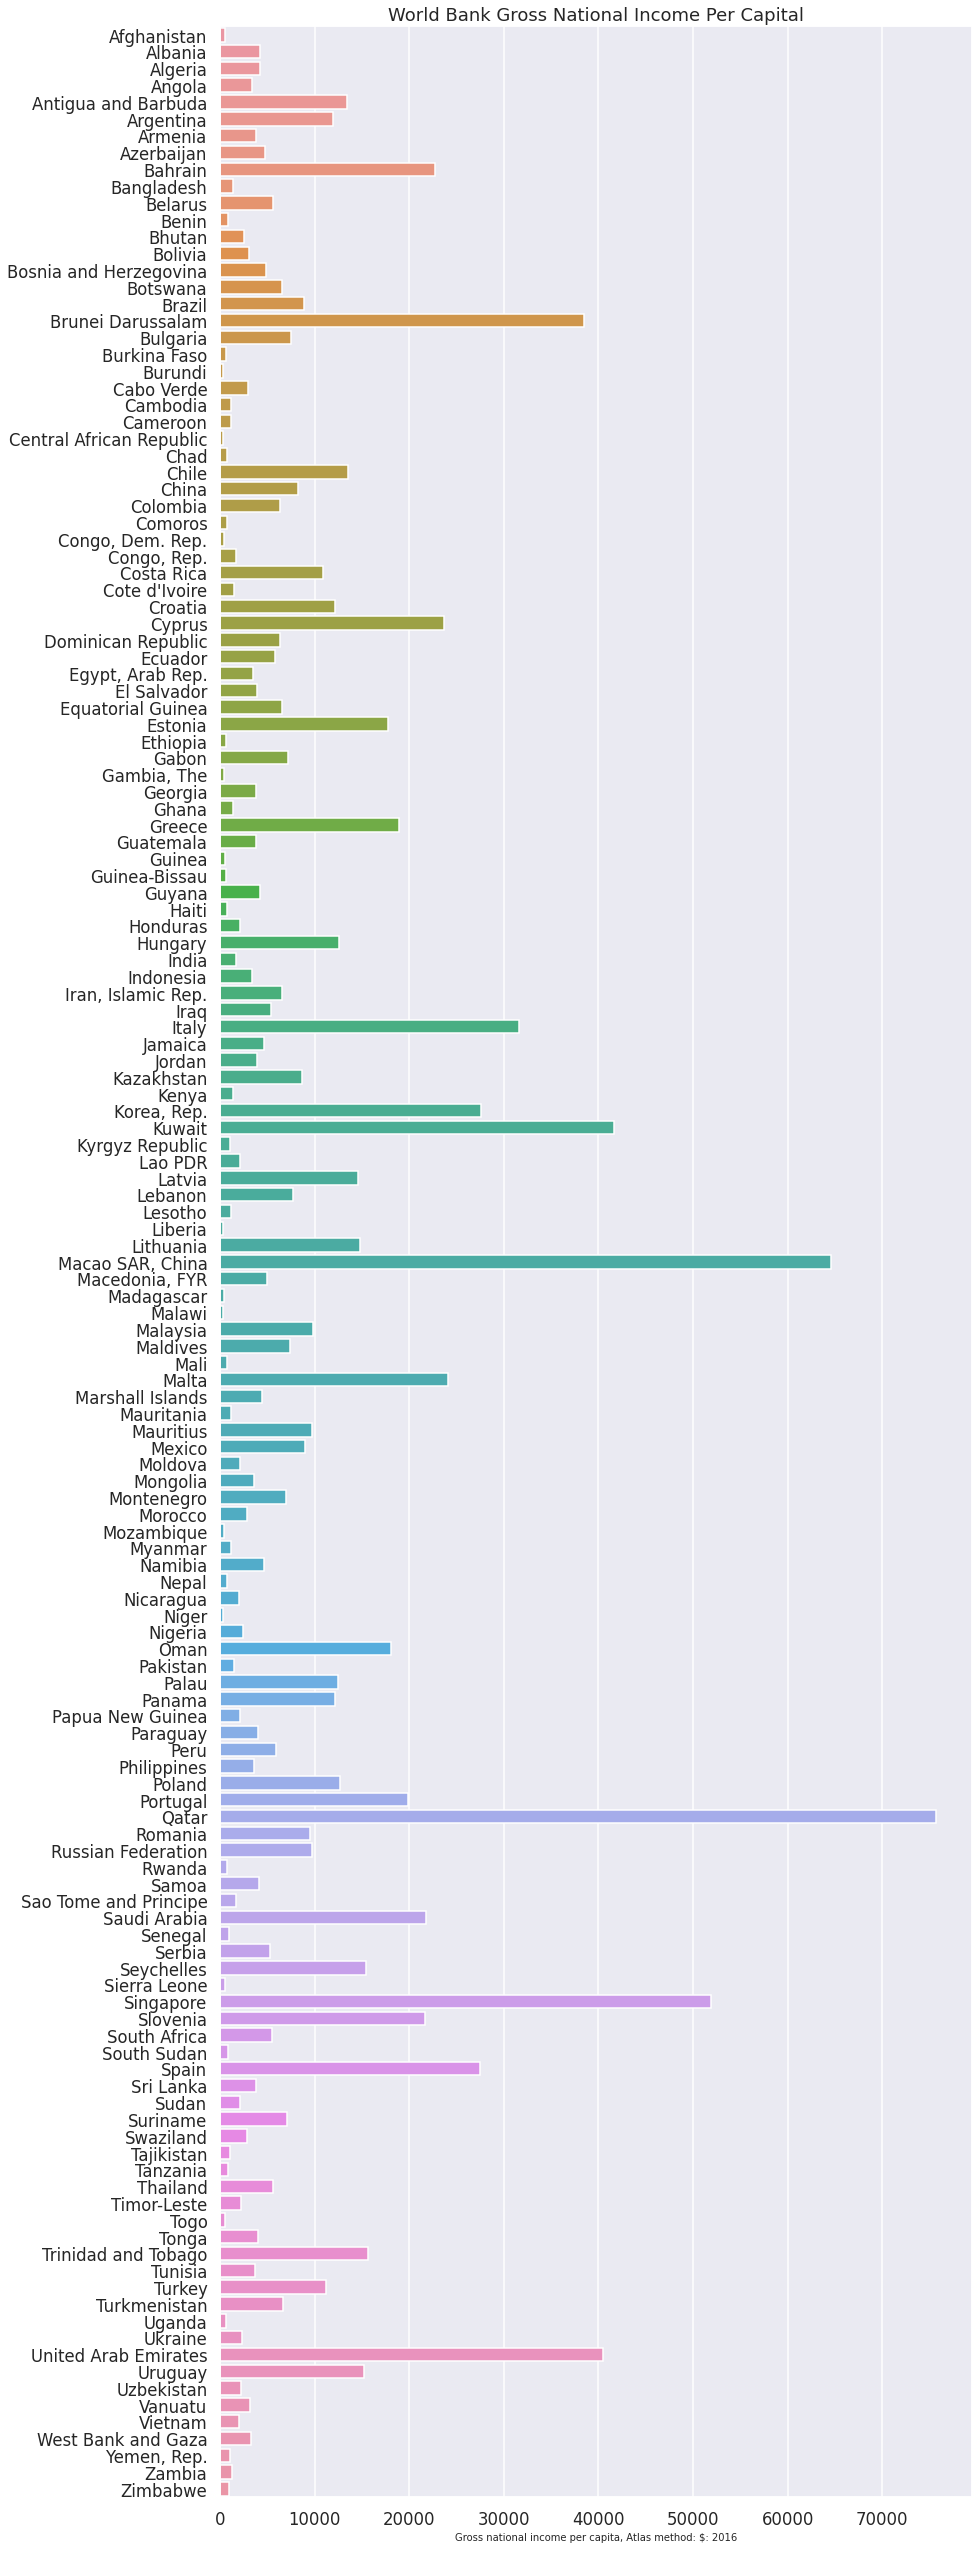

In [10]:
#Graph Parameter
plt.figure(figsize=(12, 100))

#Graph
plt.subplot(211)
ax = sns.barplot(x = df["income"], y = df.index)
ax.set(
    xlabel = "Gross national income per capita, Atlas method: $: 2016",
    title = "World Bank Gross National Income Per Capital" 
)
#sns.set(rc={"figure.figsize":(5, 20)})
plt.show()

## Task 1.5

In the cell below, create a plot of literacy rate and income per capita using the `distplot` function. As above, you should have two subplots, where the left subplot is literacy, and the right subplot is income. When you call `distplot`, set the `kde` parameter to false, e.g. `distplot(s, kde=False)`.

Don't forget to title the plot and label axes!

**Hint: ** *Copy and paste from above to start.*

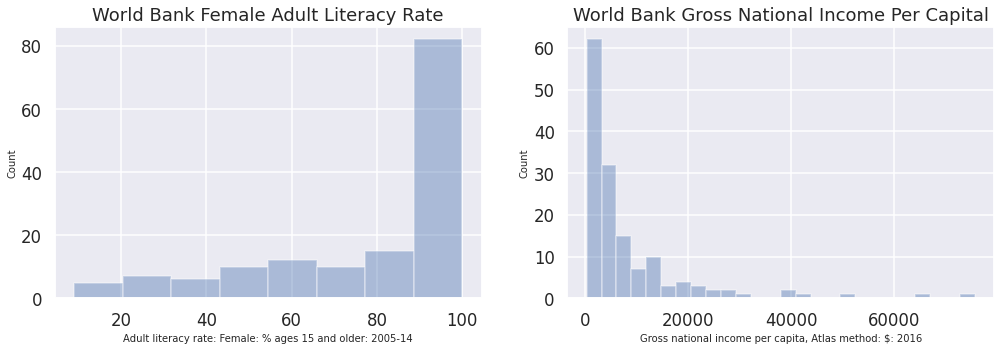

In [11]:
# YOUR CODE HERE

#Setup 
import warnings
warnings.simplefilter('ignore', category=UserWarning)
plt.figure(figsize=(15, 5))

#Left Graph
plt.subplot(121)
ax = sns.distplot(df["literacy"], kde = False)
ax.set(
    xlabel = "Adult literacy rate: Female: % ages 15 and older: 2005-14",
    ylabel = "Count",
    title = "World Bank Female Adult Literacy Rate" 
)

#Right Graph
plt.subplot(122)
ax = sns.distplot(x = df["income"], kde = False)
ax.set(
    xlabel = "Gross national income per capita, Atlas method: $: 2016",
    ylabel = "Count",
    title = "World Bank Gross National Income Per Capital"  
)

plt.show()

You should see histograms that show the counts of how many data points appear in each bin. `distplot` uses a heuristic called the Freedman-Diaconis rule (https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) to automatically identify the best bin sizes, though it is possible to set the bins yourself (we won't).

## Task 1.6
In the cell below, try creating the exact same plot again(using seaborn (sns)), but this time set the `kde` parameter to False and the `rug` parameter to True. The kde is the kernel density estimator parameter.

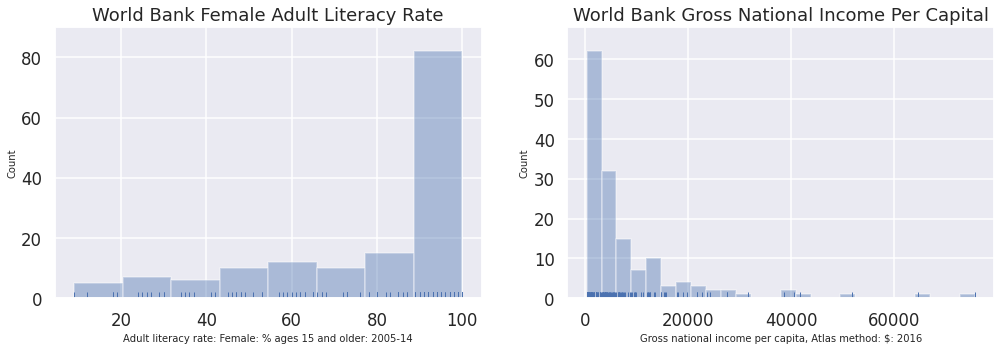

In [12]:
# YOUR CODE HERE

#Setup 
import warnings
warnings.simplefilter('ignore', category=UserWarning)
plt.figure(figsize=(15, 5))

#Left Graph
plt.subplot(121)
ax = sns.distplot(df["literacy"], kde = False, rug = True)
ax.set(
    xlabel = "Adult literacy rate: Female: % ages 15 and older: 2005-14",
    ylabel = "Count",
    title = "World Bank Female Adult Literacy Rate" 
)

#Right Graph
plt.subplot(122)
ax = sns.distplot(x = df["income"], kde = False, rug = True)
ax.set(
    xlabel = "Gross national income per capita, Atlas method: $: 2016",
    ylabel = "Count",
    title = "World Bank Gross National Income Per Capital"   
)

plt.show()

## Task 1.7
Above, you should see little lines at the bottom of the plot showing the actual data points. In the cell below, let's do one last tweak and plot with the `kde` parameter set to True.

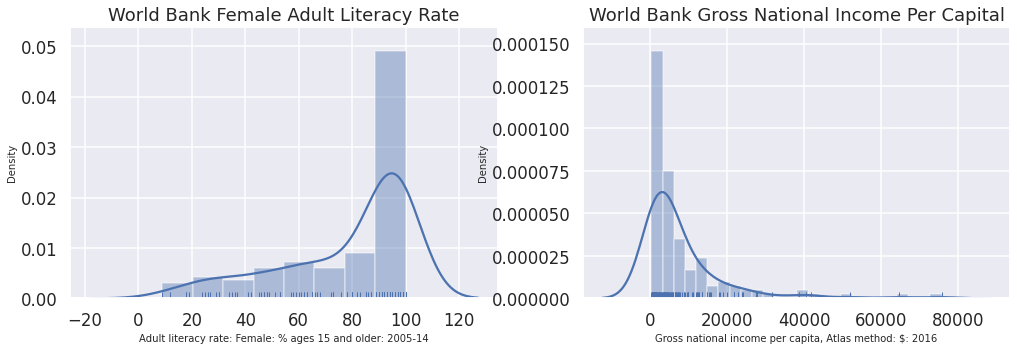

In [13]:
# YOUR CODE HERE

#Setup 
import warnings
warnings.simplefilter('ignore', category=UserWarning)
plt.figure(figsize=(15, 5))

#Left Graph
plt.subplot(121)
ax = sns.distplot(df["literacy"], kde = True, rug = True)
ax.set(
    xlabel = "Adult literacy rate: Female: % ages 15 and older: 2005-14",
    ylabel = "Density",
    title = "World Bank Female Adult Literacy Rate" 
)

#Right Graph
plt.subplot(122)
ax = sns.distplot(x = df["income"], kde = True, rug = True)
ax.set(
    xlabel = "Gross national income per capita, Atlas method: $: 2016",
    ylabel = "Density",
    title = "World Bank Gross National Income Per Capital"  
)

plt.show()

You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. 

We'll talk more about KDEs later in this lab.

## Task 1.8

Looking at the income data, it is difficult to see the distribution among high income (> $30000) countries, and the KDE also has a funny artifact where the probability density function has little bumps just above zero that correspond to the wealthy outlying countries.

We can logarithmically transform the `income` data to give us a visual representation that makes it easier to see patterns and also give a more reasonable KDE.

In the cell below, make a distribution plot with the data transformed using `np.log10` with `kde=True`. Be sure to correct the axis label using `plt.xlabel`. If you want to see the exact counts, just set `kde=False`.

Afghanistan            2.763428
Albania                3.628389
Algeria                3.630428
Angola                 3.536558
Antigua and Barbuda    4.127105
                         ...   
Vietnam                3.311754
West Bank and Gaza     3.509203
Yemen, Rep.            3.017033
Zambia                 3.113943
Zimbabwe               2.973128
Name: income, Length: 147, dtype: float64


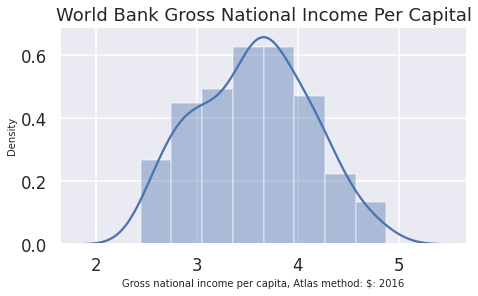

In [14]:
#Setup
import warnings
warnings.simplefilter('ignore', category=UserWarning)
plt.figure(figsize=(6.5, 4))
plt.xticks([2, 3, 4, 5])
plt.yticks([0.0, 0.2, 0.4, 0.6])

#Graph
ax = sns.distplot(x = np.log10(df["income"]), kde = True)
ax.set(
    xlabel = "Gross national income per capita, Atlas method: $: 2016",
    ylabel = "Density",
    title = "World Bank Gross National Income Per Capital"  
)

#Display
print(np.log10(df["income"]))
plt.show()

# Part 2: Kernel Density Estimation (40 pts)

In this part of the lab you will develop a deeper understanding of how kernel destiny estimation works. This section assumes that you are familiar with the basic idea of the KDE.

Suppose we have 3 data points with values 2, 4, and 9. We can compute the (useless) histogram as shown below.

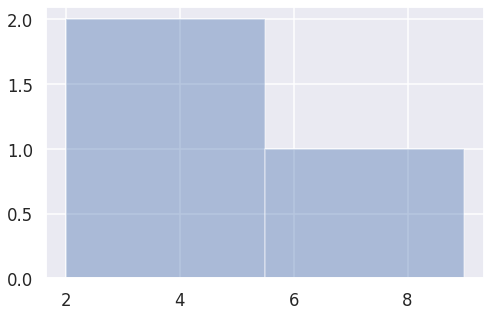

In [15]:
###Code added in since I want it to look the same###
import warnings
warnings.simplefilter('ignore', category=UserWarning)
plt.figure(figsize=(7, 5))
plt.xticks([2, 4, 6, 8])
plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0])
###Code added in since I want it to look the same###

data3pts = np.array([2, 4, 9])
sns.distplot(data3pts, kde = False);

By setting `kde=True`, we can see a kernel density estimate of the data.

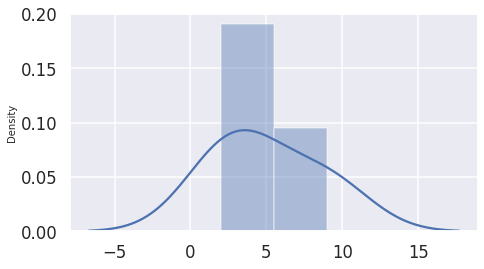

In [16]:
###Code added in since I want it to look the same###
plt.figure(figsize=(6.5, 4))
plt.xticks([-5, 0, 5, 10, 15])
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20])
###Code added in since I want it to look the same###

sns.distplot(data3pts, kde = True);

One question you might be wondering is how the kernel density estimator decides how "wide" each point should be. It turns out this is a parameter you can set called `bw`, which stands for bandwith. For example, the code below gives a bandwith value of 0.5 to each data point. You'll see the resulting kde is quite different. Try experimenting with different values of bandwidth and see what happens.

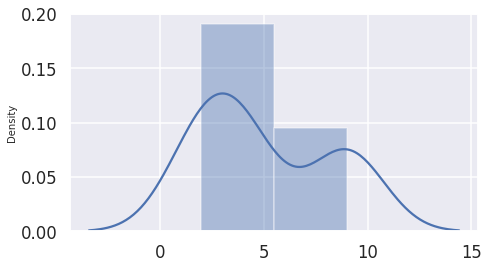

In [17]:
###Code added in since I want it to look the same###
plt.figure(figsize=(6.5, 4))
plt.xticks([0, 5, 10, 15])
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20])
###Code added in since I want it to look the same###

sns.distplot(data3pts, kde = True, kde_kws = {"bw": 0.5});

## Task 2.1

As mentioned in lecture, the kernel density estimate is just the sum of a bunch of copies of the kernel, each centered on our data points. For those of you familiar with the idea of "convolution", the KDE is simply the convolution of the kernel with the data. The default kernel used by the `distplot` function is the Guassian kernel, given by:

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} * e^{-\frac{1}{2}(\frac{x-z}{\alpha})^2}
$$

$$\Large
K(u) = \frac{1}{\sqrt{2 \pi}} * e^{-\frac{1}{2}(u)^2}
$$

In Python code, this function is given as below, where `alpha` is the parameter $\alpha$, `z` is the x coordinate of the center of the Gaussian (i.e. a data point), and `x` is the independent variable. The function header is given below. Complete the function body using the formula above. You might find function such as np.exp can be helpful.

In [18]:
## START SOLUTION
def gaussian_kernel(alpha, x, z):
    temp1 = 1 / (np.sqrt(2 * np.pi * np.square(alpha)))
    temp2 = np.exp(-np.square(x - z) / (2*np.square(alpha)))
    return temp1 * temp2

Using implemented function above, we can plot the gaussian kernel centered on $x$ coordinate 9 with $\alpha$ = 0.5 as below: 

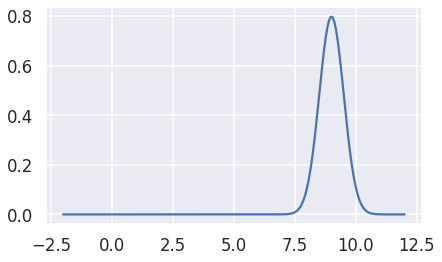

In [19]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, kde_curve)

## Task 2.2
In the cell below, plot the 3 kernel density functions corresponding to our 3 data points on the same axis. Use an `alpha` value of 0.5.

**Hint: ** *The `gaussian_kernel` function can take a numpy array as an argument for `z`*.

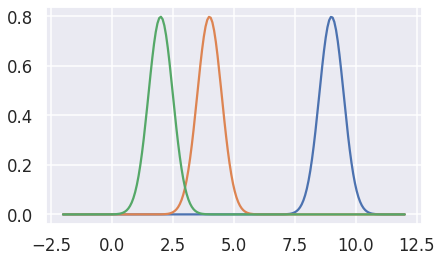

In [20]:
###Code added in since I want it to look the same###
plt.figure(figsize=(6, 4))
plt.xticks(np.arange(-2.5,12.5+2.5,2.5))
plt.yticks(np.arange(0.0,0.8+0.2,0.2))
###Code added in since I want it to look the same###

kde_curve_blue   = [gaussian_kernel(alpha, x, 9) for x in xs]
kde_curve_orange = [gaussian_kernel(alpha, x, 4) for x in xs]
kde_curve_green  = [gaussian_kernel(alpha, x, 2) for x in xs]

plt.plot(xs, kde_curve_blue)
plt.plot(xs, kde_curve_orange)
plt.plot(xs, kde_curve_green)

## Task 2.3
In the cell below, create a plot showing the sum of all three of the kernels above. Your plot should closely resemble the kde shown when you called `distplot` function with bandwidth 0.5 earlier.

**Hint: ** *Consider using np.sum with the argument `axis = 1`.*

**Hint: ** *Make sure to normalize your kernels!*

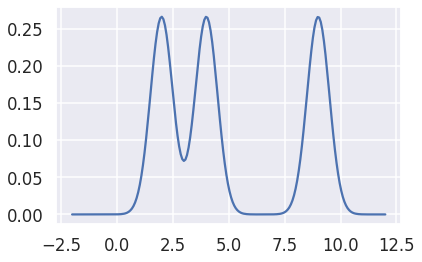

In [21]:
###Code added in since I want it to look the same###
plt.figure(figsize=(5.5, 4))
plt.xticks(np.arange(-2.5,13,2.5))
plt.yticks(np.arange(0.0,0.26,0.05))
###Code added in since I want it to look the same###

#Original Answer
anonfx = lambda x,y,z: (x + y + z) / len([x,y,z])
kde_curve_all = list(map(anonfx, kde_curve_blue, kde_curve_orange, kde_curve_green))

"""
#TODO: Figure if this is the answer
anonNormalize = lambda data: (data-np.min(data))/(np.max(data)-np.min(data)) 
kde_curve_blue_normalize   = (anonNormalize) (kde_curve_blue)
kde_curve_orange_normalize = (anonNormalize) (kde_curve_orange)
kde_curve_green_normalize  = (anonNormalize) (kde_curve_green)
anonx = lambda x,y,z: (x + y + z) / len([x,y,z])
kde_curve_all = list(map(anonx, kde_curve_blue_normalize, kde_curve_orange_normalize, kde_curve_green_normalize))
"""

plt.plot(xs, kde_curve_all)

## Task 2.4

Recall that earlier we plotted the kernel density estimation for the logarithm of the income data. Plot it again as shown below.

[]

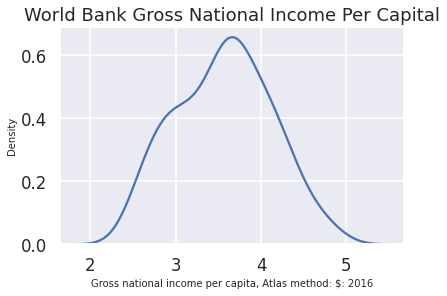

In [22]:
## START SOLUTION
###Code added in since I want it to look the same###
plt.figure(figsize=(5.5, 4))
plt.xticks([2, 3, 4, 5])
plt.yticks([0.0, 0.2, 0.4, 0.6])
###Code added in since I want it to look the same###

ax = sns.distplot(x = np.log10(df["income"]), kde = True, hist=False)
ax.set(
    xlabel = "Gross national income per capita, Atlas method: $: 2016",
    ylabel = "Density",
    title = "World Bank Gross National Income Per Capital"  
)

plt.plot()

## Task 2.5
In the cell below, make a similar plot using your technique from question 2a. Give an estimate of the $\alpha$ value chosen by the `sns.distplot` function by tweaking your `alpha` value until your plot looks almost the same.

[6.69145462e-14 1.65820626e-13 4.04613289e-13 9.72149380e-13
 2.29998643e-12 5.35828215e-12 1.22925801e-11 2.77707327e-11
 6.17829560e-11 1.35362353e-10 2.92069640e-10 6.20649383e-10
 1.29894394e-09 2.67751640e-09 5.43607893e-09 1.08709191e-08
 2.14135902e-08 4.15501013e-08 7.94203147e-08 1.49550021e-07
 2.77431709e-07 5.07061698e-07 9.13107599e-07 1.62017501e-06
 2.83272331e-06 4.88059942e-06 8.28694767e-06 1.38674064e-05
 2.28719440e-05 3.71832455e-05 5.95879349e-05 9.41386466e-05
 1.46625412e-04 2.25173223e-04 3.40978083e-04 5.09185482e-04
 7.49902311e-04 1.08931540e-03 1.56086739e-03 2.20641457e-03
 3.07726382e-03 4.23496000e-03 5.75167512e-03 7.71004136e-03
 1.02022762e-02 1.33284734e-02 1.71939821e-02 2.19058635e-02
 2.75685046e-02 3.42785653e-02 4.21195323e-02 5.11562413e-02
 6.14297834e-02 7.29532343e-02 8.57086114e-02 9.96453860e-02
 1.14680750e-01 1.30701677e-01 1.47568644e-01 1.65120709e-01
 1.83181533e-01 2.01565810e-01 2.20085614e-01 2.38556188e-01
 2.56800817e-01 2.746546

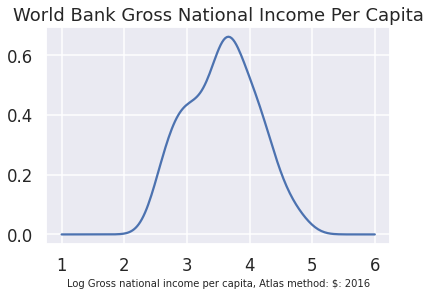

In [49]:
### Answer ###
graph = None
alpha = 0.199999999999
xs = np.linspace(1, 6, 200)
zs = np.log10(df["income"].values)
for x in xs:
    newValue = 0
    for z in zs:
        newValue += gaussian_kernel(alpha, x, z)
    newValue /= len(zs)
        
    if graph is None:
        graph = np.array([newValue])
    else:
        graph = np.append(graph, newValue)
### Answer ###

### Graph ###
plt.figure(figsize=(5.5, 4))
plt.xticks([1, 2, 3, 4, 5, 6])
plt.yticks([0.0, 0.2, 0.4, 0.6])
plt.title("World Bank Gross National Income Per Capita")
plt.xlabel("Log Gross national income per capita, Atlas method: $: 2016", fontsize=10)
#plt.ylabel('Density', style='italic', loc='bottom')

print(graph)
plt.plot(xs, graph)
### Graph ###

## Task 2.6

In your answers above, you hard coded a lot of your work. In this problem, you'll build a more general kernel density estimator function.

Implement the KDE function which computes:

$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where $z_i$ are the data, $\alpha$ is a parameter to control the smoothness, and $K_\alpha$ is the kernel density function passed as `kernel`.

In [24]:
# YOUR CODE HERE
def kde(f, alpha, x, z):
    #z is data/dataframe
    n = len(z)
    return 1/n * sum([f(alpha, x, z[i]) for i in range(1, n)])

Assuming you implemented `kde` correctly, the code below should generate the `kde` of the log of the income data as before.

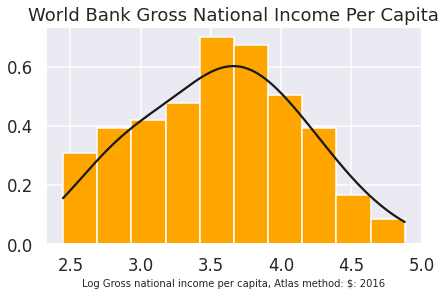

In [25]:
#Calculation
alpha=0.3
df['trans_inc'] = np.log10(df['income'])
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]

#Graph
plt.hist(df['trans_inc'], density=True, color='orange')
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');
plt.plot(xs, curve, 'k-');

## Task 2.7
And the code below should show a 3 x 3 set of plots showing the output of the kde for different `alpha` values. Try it

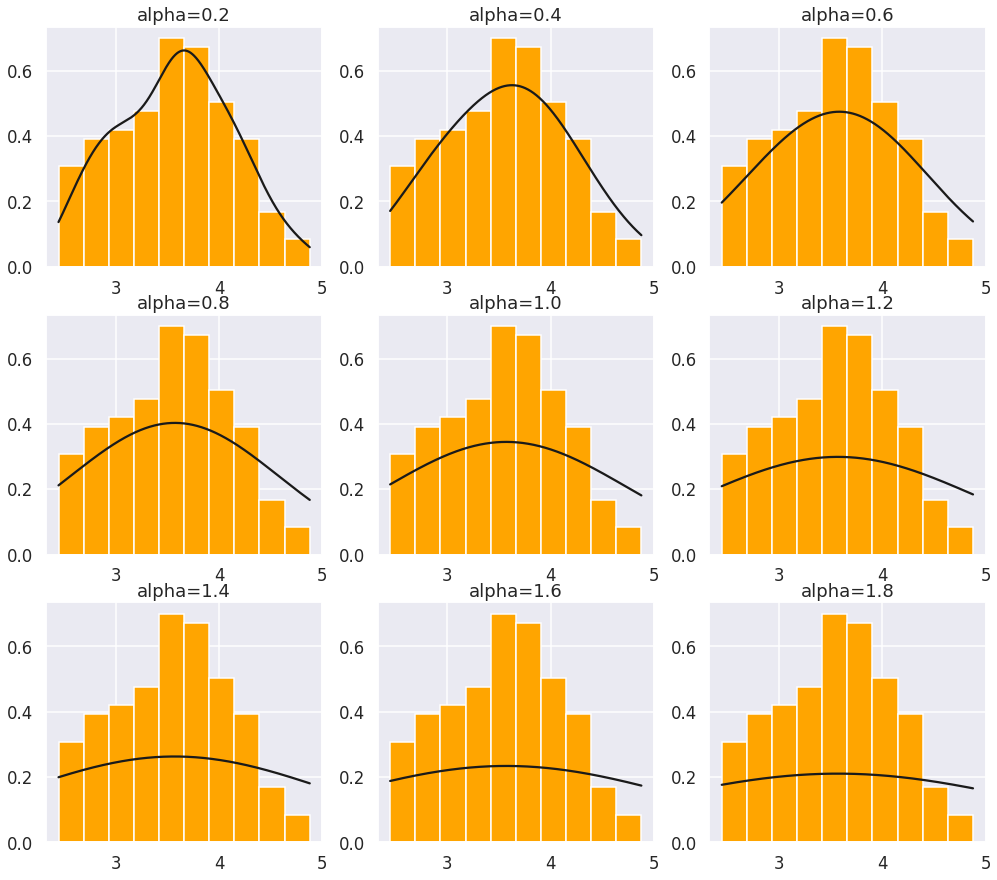

In [26]:
plt.figure(figsize=(15,15))
alphas = np.arange(0.2, 2.0, 0.2)
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i+1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], density=True, color='orange')
    plt.plot(xs, curve, 'k-')
    plt.title("alpha=" + str(round(alpha, 2)))
plt.show()

Let's take a look at another kernel, the Boxcar kernel.

In [27]:
def boxcar_kernel(alpha, x, z):
    return ( ((x-z)>=-alpha/2) & ((x-z)<=alpha/2) ) / alpha

### Task 2.7.1 Implement TriWeight kernel function
The TriWeight Kernel function is given by K(u) = (35/32)(1-u^2)^3 where ^ is the exponent

$$\Large
K(u) = \frac{35}{32} (1-u^{2})^3 
$$

$$\Large
u = \frac{x-z}{\alpha} 
$$

$$\Large
|u| \leq 1
$$

In [102]:
def triweight_kernel(alpha, x, z):
    u = ((x-z)/alpha)
    
    return ((35/32) * np.power((1 - np.square(u)), 3))/ alpha

Run the cell below to enable interactive plots. It should give you a validating 'OK' when it's finished.

In [51]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Now, we can plot the Boxcar, Gaussian kernel and Triweight functions to see what they look like.

In [103]:
import numpy as np
x = np.linspace(-10,10,1000)
def f(alpha):
    ###Code added in since I want it to look the same###
    plt.figure(figsize=(7.5, 5))
    plt.xticks([-10, -5, 0, 5, 10])
    plt.yticks([0.000, 0.025, 0.050, 0.075, 0.100, 0.125])
    ###Code added in since I want it to look the same###
    
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.plot(x, triweight_kernel(alpha,x,0), label='Triweight')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1));

Using the interactive plot below compare the the three kernel techniques:  (Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [104]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], density=True, color='orange')
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    t_curve = [kde(triweight_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, t_curve, 'r-', label='Triweight')
    plt.legend(title='Kernel Function')
    plt.show()
    
    
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1))

"\nxs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)\ndef f(alpha_g, alpha_b):\n    plt.hist(df['trans_inc'], density=True, color='orange')\n    \n    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]\n    plt.plot(xs, g_curve, 'k-', label='Gaussian')\n    \n    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]\n    plt.plot(xs, b_curve, 'r-', label='Boxcar')\n    \n    t_curve = [kde(triweight_kernel, alpha_b, x, df['trans_inc']) for x in xs]\n    plt.plot(xs, t_curve, 'r-', label='Triweight')\n    \n    plt.legend(title='Kernel Function')\n    plt.show()\ninteract(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1))\n"

<div class="alert alert-block alert-info">
<h2>Lab Feedback  </h2> 
<b> Practicality:</b> 1(lowest)  10 (highest) : <br>
<b> Time to complete (in hours): </b>  <br>
<b> How to improve this lab? </b> Please provide constructive feedback <br>
</div>

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_Lab4.jpynb<br>
<b> Submit To: </b> DO NOT submit data files. Submit the ipynb file to codebench.cs.rutgers.edu <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

#  

<b> @2020-2022 A.D. Gunawardena. All Rights Reserved. </b> <br>
Additional Credits: Josh Hug, Berkeley Data Science Group and Steve Skiena.
DO NOT Share this lab.